<a href="https://colab.research.google.com/github/KEERTHANA2103/PRODIGY_DS_04/blob/main/twitter_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task - 04**

**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

#**Import the Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#**Load the Dataset**

In [6]:
df= pd.read_csv('/content/twitter_training.csv')
validate_df= pd.read_csv('/content/twitter_validation.csv')

In [7]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
48164,5868,HomeDepot,Neutral,"How Ethan Blank, Bernie Marcus co-founded Home..."
48165,5868,HomeDepot,Neutral,"How Arthur Blank, Bernie Marcus co - executive..."
48166,5868,HomeDepot,Neutral,"of Arthur Blank, Bernie Marcus Family-founded ..."
48167,5869,HomeDepot,Negative,To all the idiots taking all the water from Ho...


In [9]:
validate_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
df.columns = ['id', 'game', 'sentiment', 'text']
validate_df.columns = ['id', 'game', 'sentiment', 'text']

In [11]:
df

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
48164,5868,HomeDepot,Neutral,"How Ethan Blank, Bernie Marcus co-founded Home..."
48165,5868,HomeDepot,Neutral,"How Arthur Blank, Bernie Marcus co - executive..."
48166,5868,HomeDepot,Neutral,"of Arthur Blank, Bernie Marcus Family-founded ..."
48167,5869,HomeDepot,Negative,To all the idiots taking all the water from Ho...


In [13]:
validate_df

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


#**Data Cleansing and Data Preprocessing**

In [14]:
df.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [15]:
df.shape

(48169, 4)

In [17]:
df.describe()

,id
count,48169.000000
mean,6122.095767
std,4040.401538
min,1.000000
25%,2465.000000
50%,5750.000000
75%,9532.000000
max,13200.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48169 entries, 0 to 48168
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         48169 non-null  int64 
 1   game       48169 non-null  object
 2   sentiment  48169 non-null  object
 3   text       47602 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [19]:
df.describe(include='all')

,id,game,sentiment,text
count,48169.000000,48169,48169,47602
unique,NaN,21,4,44531
top,NaN,Microsoft,Positive,It is not the first time that the EU Commissio...
freq,NaN,2400,14321,111
mean,6122.095767,NaN,NaN,NaN
std,4040.401538,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,2465.000000,NaN,NaN,NaN
50%,5750.000000,NaN,NaN,NaN
75%,9532.000000,NaN,NaN,NaN


#**Data Analysis and Data Visualization**

In [21]:
id_type = df['id'].value_counts()
id_type

4528    6
7506    6
7519    6
7518    6
7517    6
       ..
3140    6
3139    6
5867    6
2401    5
5869    2
Name: id, Length: 8029, dtype: int64

In [23]:
df.isnull().sum()

id             0
game           0
sentiment      0
text         567
dtype: int64

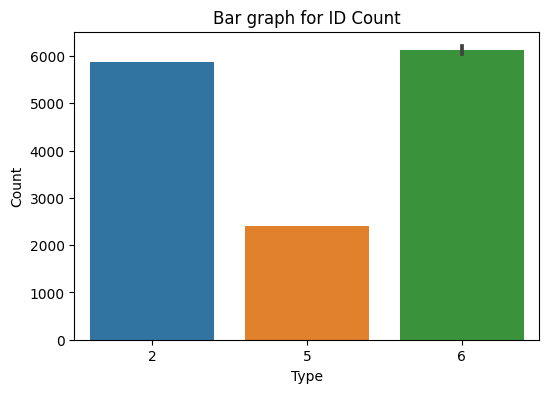

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(y=id_type.index, x=id_type.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Bar graph for ID Count')
plt.show()

In [28]:
game_type = df['game'].value_counts()
game_type

Microsoft                            2400
LeagueOfLegends                      2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Dota2                                2364
WorldOfCraft                         2364
NBA2K                                2352
Battlefield                          2346
Overwatch                            2334
Xbox(Xseries)                        2334
Amazon                               2316
PlayStation5(PS5)                    2310
CS-GO                                2304
Google                               2298
Hearthstone                          2298
Borderlands                          2285
Fortnite                             2274
PlayerUnknownsBattlegrounds(PUBG)    2274
AssassinsCreed                       2244
HomeDepot                            1544
Name: game, dtype: int64

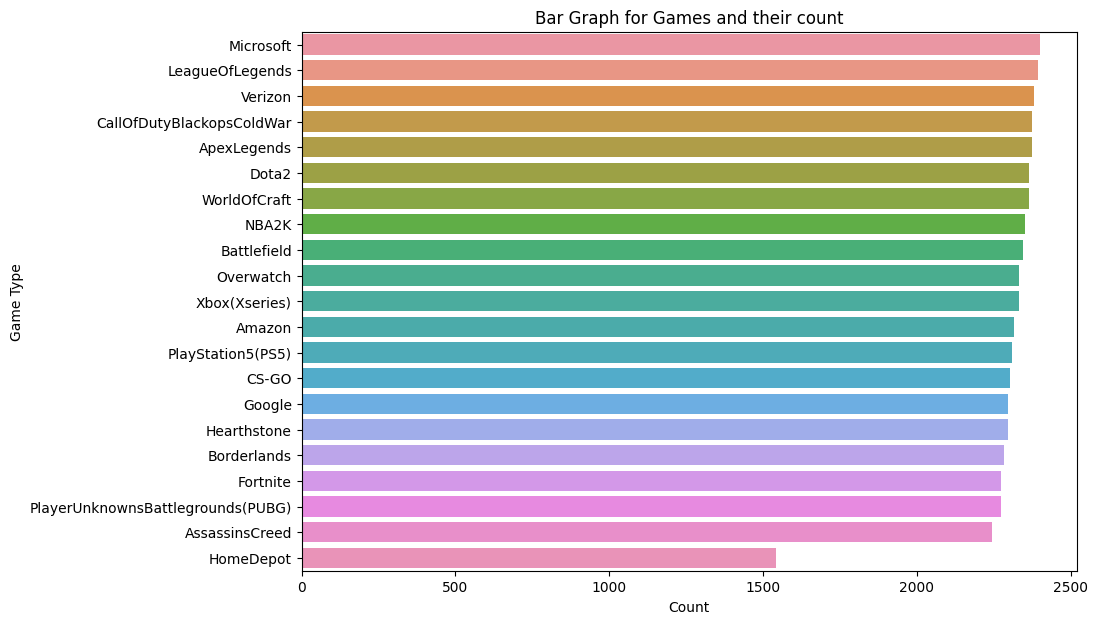

In [30]:
plt.figure(figsize=(10,7))
sns.barplot(x=game_type.values,y=game_type.index)
plt.title('Bar Graph for Games and their count')
plt.ylabel('Game Type')
plt.xlabel('Count')

plt.show()

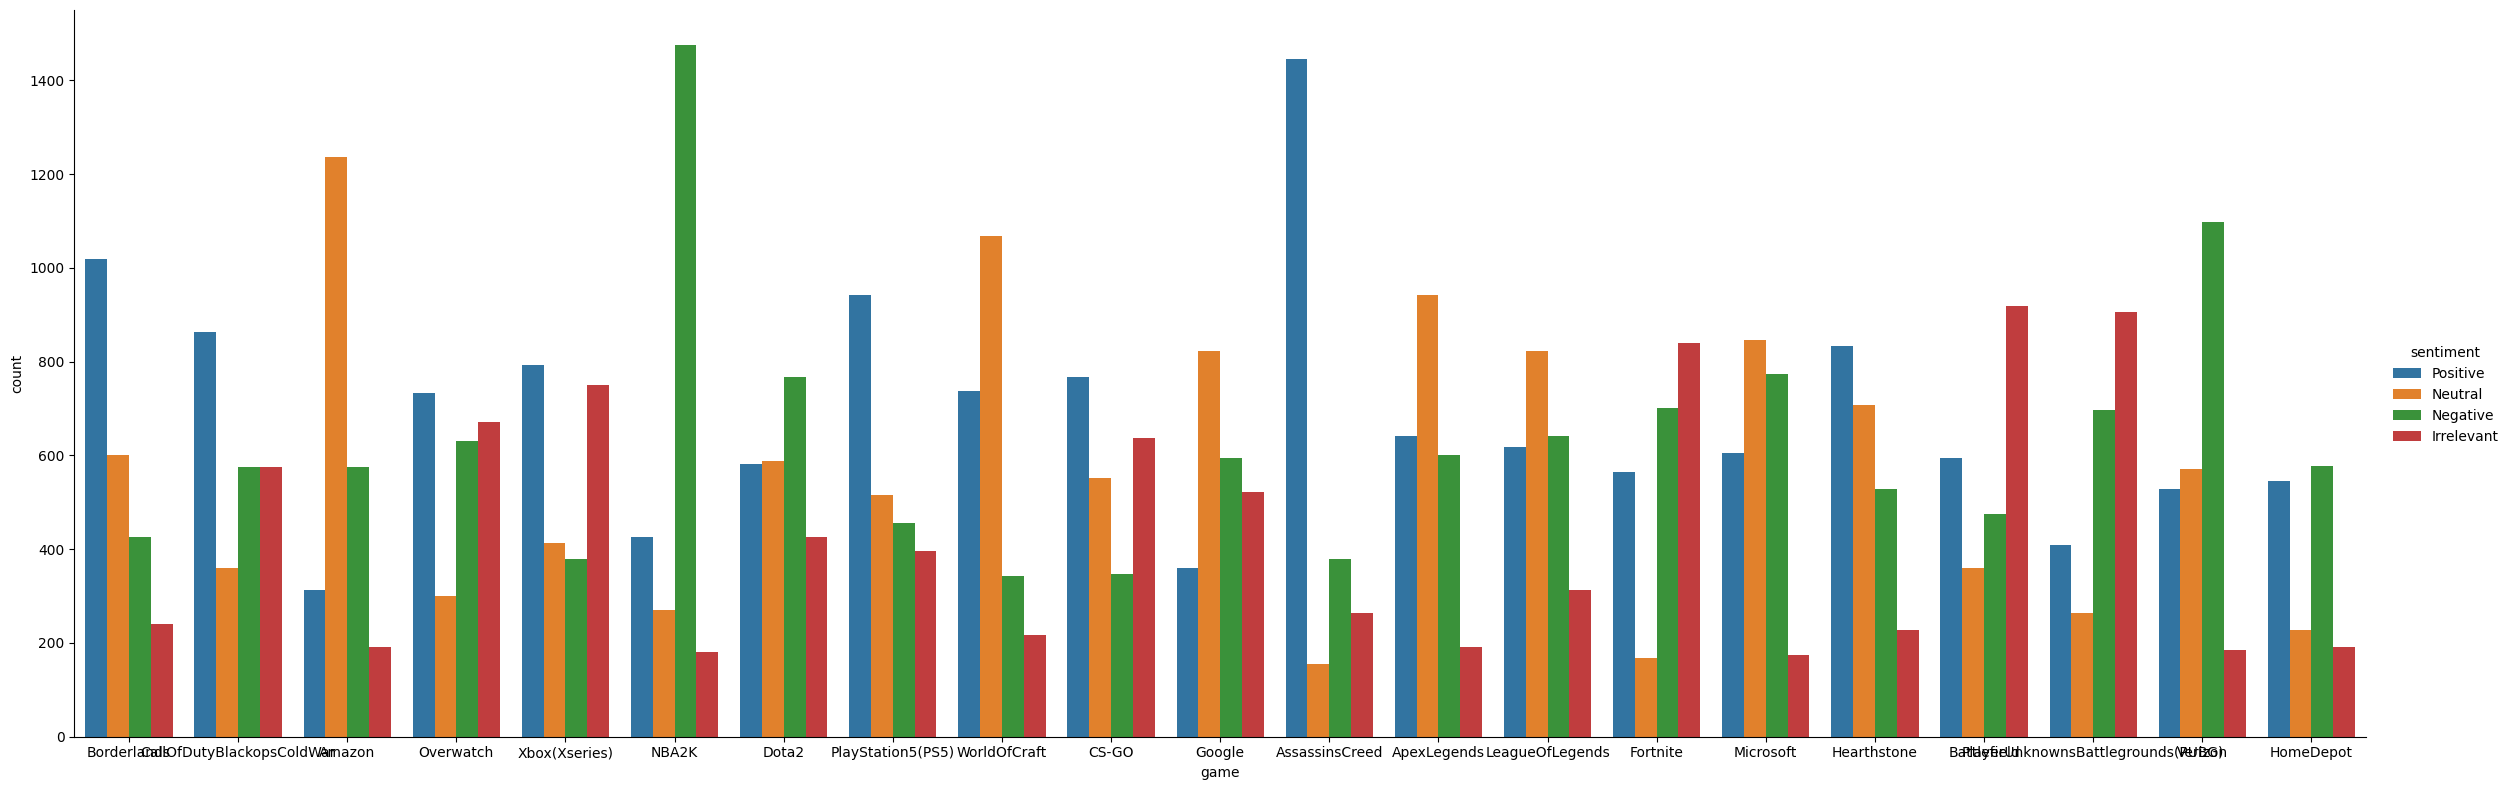

In [33]:
sns.catplot(x="game",hue="sentiment", kind="count",height=8,aspect=3, data=df)

<Axes: >

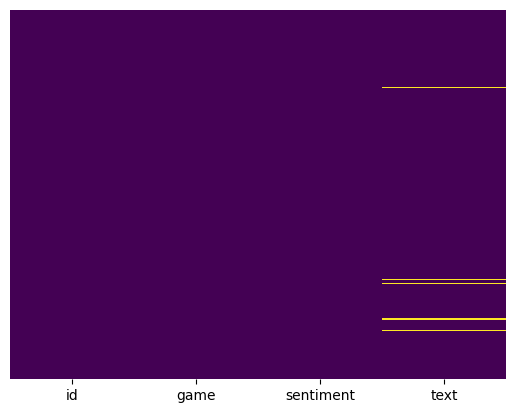

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
total_null_value=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null_value,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  48169


,Total Missing,In Percent
text,567,1.18
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [37]:
df.dropna(subset=['text'],inplace=True)
total_null_value=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null_value,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  47602


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [38]:
train0=df[df['sentiment']=="Negative"]
train1=df[df['sentiment']=="Positive"]
train2=df[df['sentiment']=="Irrelevant"]
train3=df[df['sentiment']=="Neutral"]

In [39]:
train0.shape, train1.shape, train2.shape, train3.shape

((12902, 4), (14191, 4), (8897, 4), (11612, 4))

In [40]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [41]:
train0.shape, train1.shape, train2.shape, train3.shape

((1075, 4), (1182, 4), (741, 4), (967, 4))

In [42]:
df=pd.concat([train0,train1,train2,train3],axis=0)
df

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
4700,7,Amazon,Neutral,Amazon I Israel.. Amazon.se/2019/05/01/ama…<unk>]
4701,7,Amazon,Neutral,Amazon I visited Israel.. from carlnorberg. ca...
4702,7,Amazon,Neutral,Amazon website of.. by.se/2019/05/01/ama... []
4715,10,Amazon,Neutral,@Biohazzards Thanks for entering Grand Summone...


In [43]:
id_type = df['id'].value_counts()
id_type

2405    6
1664    6
1670    6
1673    6
1676    6
       ..
1763    2
1929    2
1602    2
10      2
79      1
Name: id, Length: 669, dtype: int64

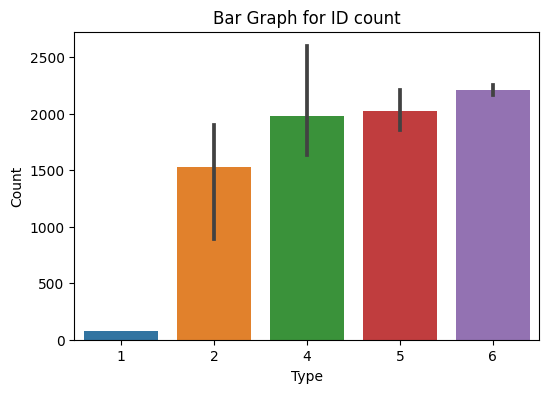

In [58]:
plt.figure(figsize=(6,4))
sns.barplot(x=id_type.values,y=id_type.index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Bar Graph for ID count')
plt.show()

In [45]:
game_type = df['game'].value_counts()
game_type

Borderlands                  2279
CallOfDutyBlackopsColdWar    1581
Amazon                        105
Name: game, dtype: int64

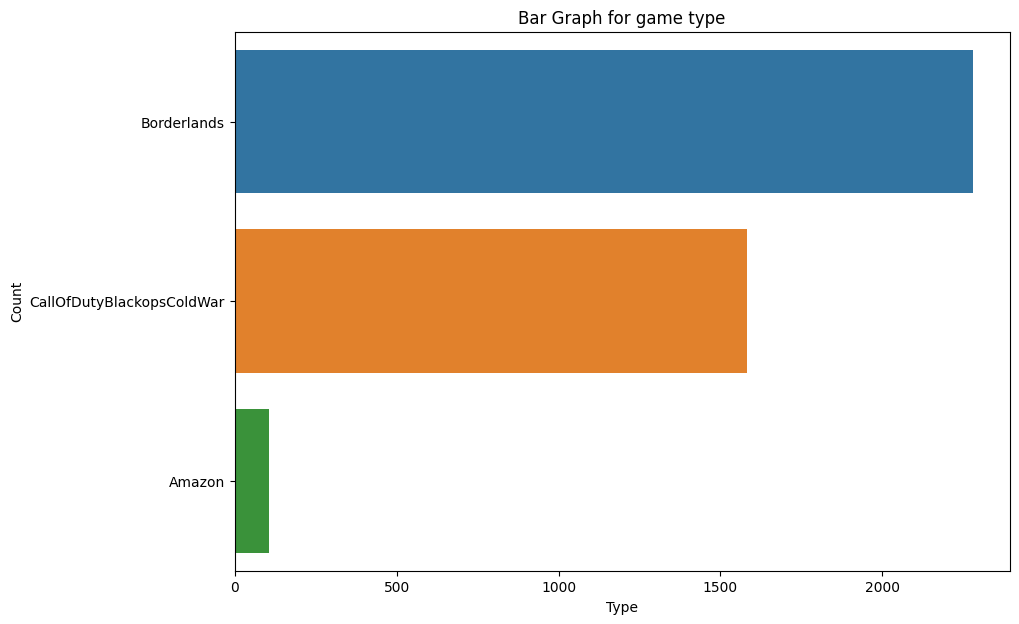

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x=game_type.values,y=game_type.index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Bar Graph for game type')
plt.show()

In [47]:
sentiment_types = df['sentiment'].value_counts()
sentiment_types

Positive      1182
Negative      1075
Neutral        967
Irrelevant     741
Name: sentiment, dtype: int64

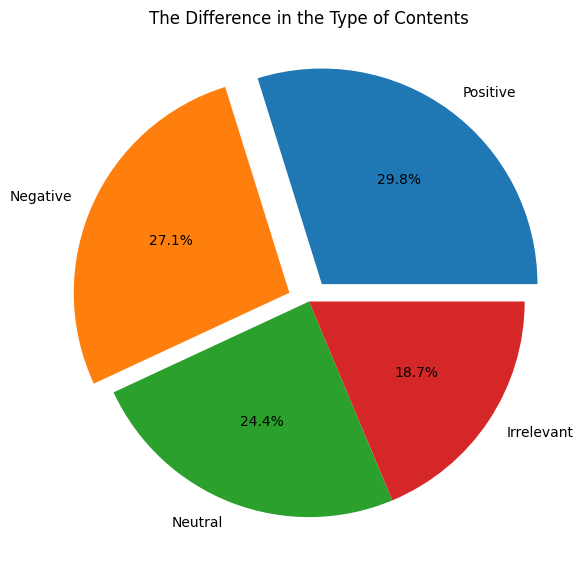

In [48]:
plt.figure(figsize=(10,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

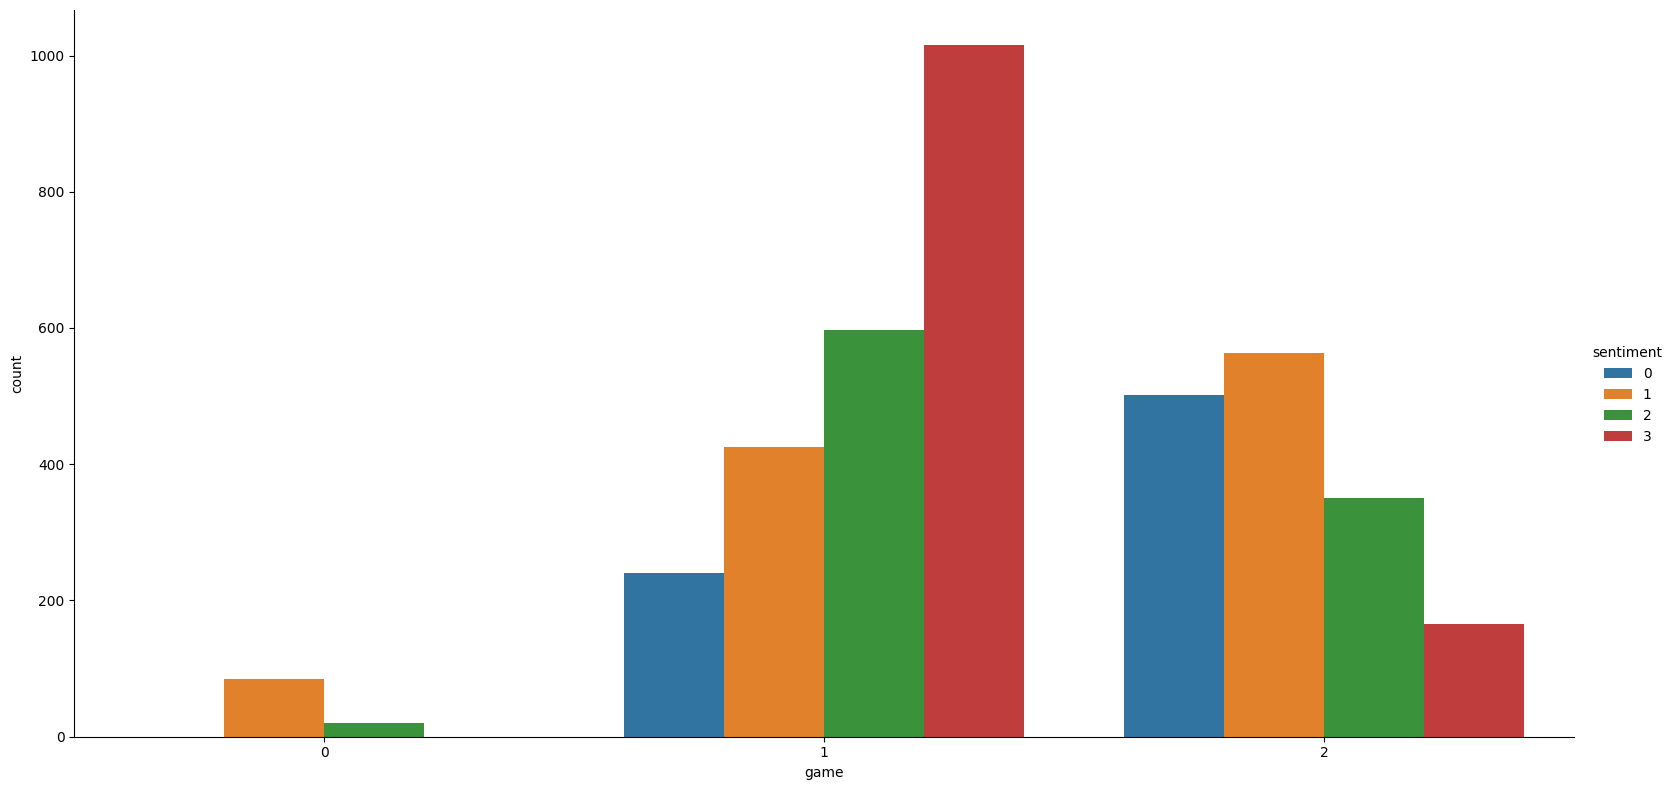

In [61]:
sns.catplot(x='game',hue='sentiment',kind='count',height=8,aspect=2,data=df)

In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [53]:
df['sentiment']=label_encoder.fit_transform(df['sentiment'])
df['game']=label_encoder.fit_transform(df['game'])
validate_df['sentiment']=label_encoder.fit_transform(validate_df['sentiment'])
validate_df['game']=label_encoder.fit_transform(validate_df['game'])

In [54]:
df = df.drop(['id'],axis=1)
df

,game,sentiment,text
23,1,1,the biggest dissappoinment in my life came out...
24,1,1,The biggest disappointment of my life came a y...
25,1,1,The biggest disappointment of my life came a y...
26,1,1,the biggest dissappoinment in my life coming o...
27,1,1,For the biggest male dissappoinment in my life...
...,...,...,...
4700,0,2,Amazon I Israel.. Amazon.se/2019/05/01/ama…<unk>]
4701,0,2,Amazon I visited Israel.. from carlnorberg. ca...
4702,0,2,Amazon website of.. by.se/2019/05/01/ama... []
4715,0,2,@Biohazzards Thanks for entering Grand Summone...


In [56]:
df.nunique()

game            3
sentiment       4
text         3747
dtype: int64

In [57]:
validate_df.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64